# Entrega 1

- Germán Otero, N° de estudiante: 138796
- Sebastián Uriarte Güimil, N° de estudiante: 194973

### Ejercicio 1:
**Conclusiones a partir de un resumen numérico**

Abajo se muestran indicadores que caracterizan la distribución de notas de dos
clases paralelas de un curso de Inglés. El puntaje máximo es 100.

|                 | **Clase 1** | **Clase 2** |
|-----------------|:-----------:|:-----------:|
|     Promedio    |      72     |      78     |
|     Mediana     |      73     |      65     |
| Desvio estandar |      6      |      16     |

1. Bosquejar el histograma (o la densidad) de la distribución de notas de cada clase.
2. ¿En cuál de las dos clases es más probable encontrar un estudiante con nota alta?

___

**1.** Tenemos entonces en este caso dos clases con distintos valores para media,
mediana y desviación estándar a las que, en primer lugar, nos piden graficar su
distribución de notas.

Para ello, en el caso de la clase 1, se observa que sus valores de promedio y
mediana son cercanos. Debido a esto, resulta posible, a efectos del ejercicio,
asumir que la distribución de sus datos deberá ajustarse aproximadamente al
comportamiento de una distribución normal. Dado esto, entonces, podemos realizar
lo siguiente:

In [5]:
import numpy as np

np.random.seed(21)
class_1_data = np.random.normal(loc=72, scale=6, size=100)

print(f"Promedio: {np.mean(class_1_data)}")
print(f"Mediana: {np.median(class_1_data)}")
print(f"Desviación estándar: {np.std(class_1_data)}")

Promedio: 72.62652276395252
Mediana: 73.29288183318343
Desviación estándar: 6.396788077908454


Bajo esta configuración se logró hallar valores similares (sobre todo si son
truncados) a los propuestos por la letra del ejercicio. La propuesta no menciona
el número de estudiantes en la clase, pero nótese que en este caso se tomó un
tamaño de muestra relativamente chico. Es esperable que, cuanto mayor sea ésta,
habrán de obtenerse más cercanos de promedio y mediana, por lo que el que sean
pocos datos juega a favor de replicar los valores presentados por el ejercicio.

Para graficarlos, por otro lado, es posible realizar lo siguiente:

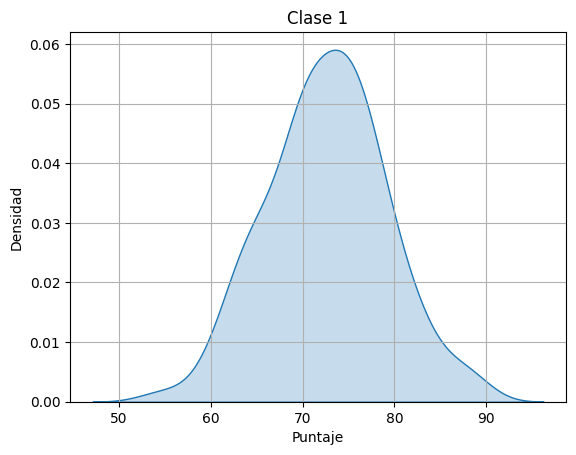

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(class_1_data, fill=True)
plt.title("Clase 1")
plt.xlabel("Puntaje")
plt.ylabel("Densidad")
plt.grid()

Con respecto a la clase 2, resulta un poco más complejo el análisis. Dado que
la diferencia entre el promedio y la mediana es bastante mayor que para la clase
1, la asunción y el mecanismo utilizado para generar datos en el caso anterior
parecería no ser el mejor para este.

En clase, al tratarse este ejercicio, se sugiere usar el siguiente vector de
datos: `[62] * N + [65] + [94] * N`, donde `N` es un entero dado. De esta forma, se
observa, es posible lograr un arreglo de datos que tenga `N` datos de valor 62 (menores
a 65), el 65 y luego `N` datos de valor 94 (mayor a  65). Se estaría respetando así la
mediana impuesta por la propuesta, al ser este el valor central a este vector de largo
`2N + 1`. Esto se cumplirá además para todo conjunto de datos cuyos primeros `N` valores
sumen $62N$, luego venga el 65, y sus últimos `N` miembros sumen $64N$.

Asimismo, puesto que $\frac{62N + 65 + 94N}{N + 1 + N} = \frac{156N}{2N + 1} \approxeq \frac{156}{2} = 76$,
sería esperable que también se respeten los otros valores. En efecto:

In [9]:
N = 3000
class_2_data = np.array([62] * N + [65] + [94] * N)

print(f"Promedio: {np.mean(class_2_data)}")
print(f"Mediana: {np.median(class_2_data)}")
print(f"Desviación estándar: {np.std(class_2_data)}")

Promedio: 77.99783369438427
Mediana: 65.0
Desviación estándar: 15.99954679743723


Para obtener el gráfico solicitado en este ejercicio, entonces:

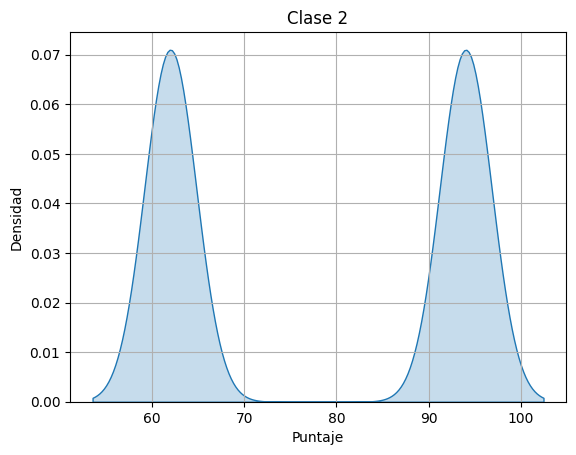

In [10]:
sns.kdeplot(class_2_data, fill=True)
plt.title("Clase 2")
plt.xlabel("Puntaje")
plt.ylabel("Densidad")
plt.grid()

**2.** Comparando las distribuciones de notas de estas dos clases, dados los valores
presentados en las propuesta, es posible observar que la clase 1 presenta notas
bastante concentradas en su media de 72, mientras que en la clase 2 hay más variabilidad
en sus valores. Una mayor desviación estándar hace que sea más probable encontrar
valores más lejanos de la media, tanto inferiores como, en particular, superiores.
Por tanto, asumiendo que "nota alta" refiere a notas superiores a 90, esto sería más
probable hallar en la clase 2. Esto se puede observar, y si bien fueron datos generados
de forma bastante artificial, en la serie de datos y las gráficas anteriores, teniendo
la segunda un pico en torno a la zona cercana al 90-100.

___

### Ejercicio 2:

**Máxima verosimilitud**

Suponga que una persona lanza 100 veces una moneda y obtiene 62 caras. Estime la
probabilidad de que al lanzar dicha moneda el resultado sea cara. Haga esto usando el
método de máxima verosimilitud y el algoritmo de optimización _Golden Section Search_.
¿Es el resultado lo que esperaba de forma intuitiva?


Para ello:

#### 2.1 Máxima verosimilitud

In [3]:
import numpy as np
import matplotlib.pyplot as plt

T = np.array([0] * 38 + [1] * 62)
N = T.shape[0]


def p(z, theta):
    return 0.5 * (1 + theta * z)


def L(theta):
    return np.prod(0.5 * (1 + theta * T))


def NLL(theta):
    return -np.sum(np.log((0.5 * (1 + theta * T))))

/var/folders/6n/b144y_sj6b71j0ssjjy720mw0000gn/T/ipykernel_6783/102736960.py:17: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log((0.5 * (1 + theta * T))))


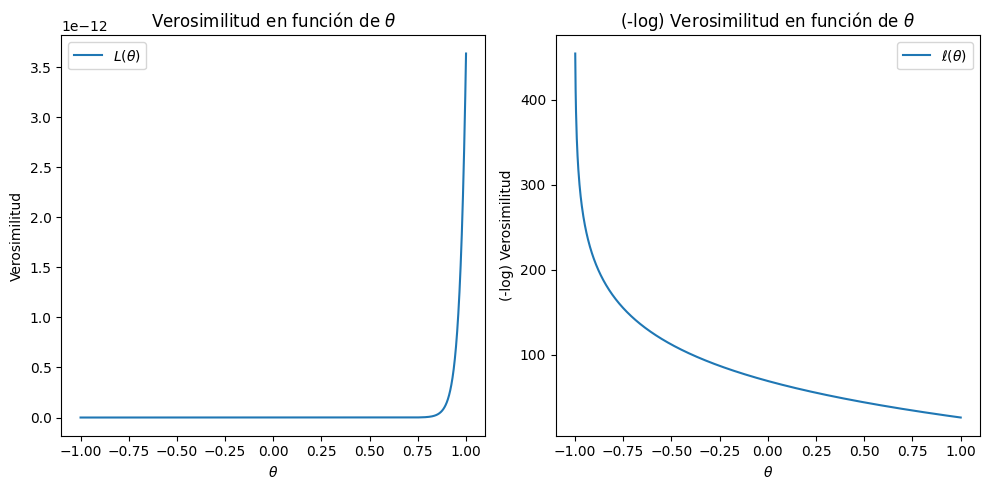

In [4]:
theta_range = np.linspace(-1, 1, 1000)

NLL_range = []
for i in range(len(theta_range)):
    NLL_range.append(NLL(theta_range[i]))

L_range = []
for i in range(len(theta_range)):
    L_range.append(L(theta_range[i]))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(theta_range, L_range, label=r"$L(\theta)$")
axes[0].set_title(r"Verosimilitud en función de $\theta$")
axes[0].set_xlabel(r"$\theta$")
axes[0].set_ylabel("Verosimilitud")
axes[0].legend()

axes[1].plot(theta_range, NLL_range, label=r"$\ell(\theta)$")
axes[1].set_title(r"(-log) Verosimilitud en función de $\theta$")
axes[1].set_xlabel(r"$\theta$")
axes[1].set_ylabel("(-log) Verosimilitud")
axes[1].legend()

plt.tight_layout()
plt.show()

/var/folders/6n/b144y_sj6b71j0ssjjy720mw0000gn/T/ipykernel_6783/102736960.py:17: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log((0.5 * (1 + theta * T))))


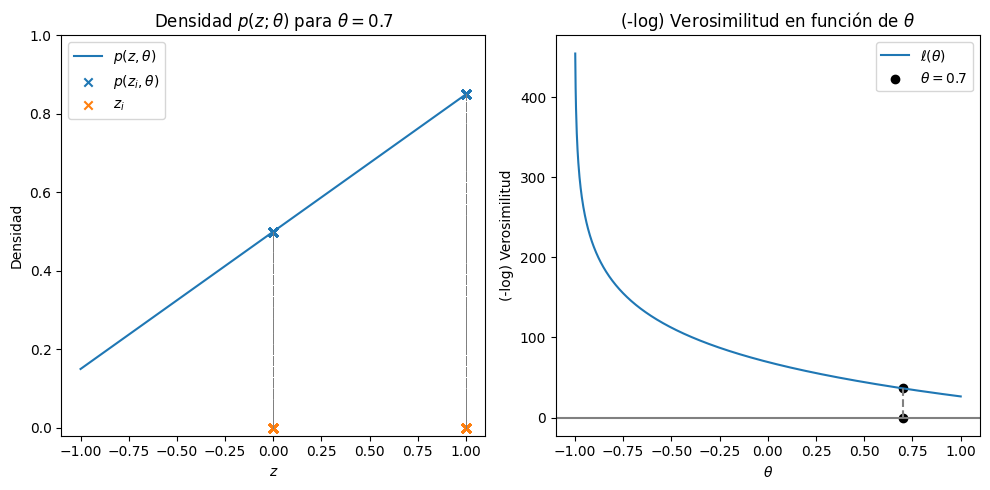

In [5]:
theta = 0.7
theta_range = np.linspace(-1, 1, 1000)

NLL_range = []
for i in range(len(theta_range)):
    NLL_range.append(NLL(theta_range[i]))

z_range = np.linspace(-1, 1, 100)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(z_range, p(z_range, theta), label=r"$p(z,\theta)$")
axes[0].set_ylim(-0.02, 1)

for i in range(N):
    axes[0].plot(
        [T[i], T[i]],
        [0, p(T[i], theta)],
        linestyle="dashed",
        color="gray",
        linewidth=0.5,
    )

axes[0].scatter(T, p(T, theta), marker="x", label=r"$p(z_i,\theta)$")
axes[0].scatter(T, [0] * N, marker="x", label=r"$z_i$")
axes[0].set_title(r"Densidad $p(z;\theta)$ para $\theta=$" + str(theta))
axes[0].set_xlabel(r"$z$")
axes[0].set_ylabel("Densidad")
axes[0].legend()

axes[1].plot(theta_range, NLL_range, label=r"$\ell(\theta)$")
axes[1].plot([theta, theta], [0, NLL(theta)], linestyle="dashed", color="gray")
axes[1].scatter(
    [theta, theta], [0, NLL(theta)], color="black", label=r"$\theta=$" + str(theta)
)
axes[1].axhline(y=0, color="gray")
axes[1].set_title(r"(-log) Verosimilitud en función de $\theta$")
axes[1].set_xlabel(r"$\theta$")
axes[1].set_ylabel("(-log) Verosimilitud")
axes[1].legend()

plt.tight_layout()
plt.show()

#### 2.2 _Golden Section Search_

In [8]:
phi = (1 + np.sqrt(5)) / 2


def golden_search(f, theta_l, theta_u, tolerance=0.001):
    theta_hat = theta_u
    Iter = 0

    while np.abs(theta_u - theta_l) > tolerance:
        print(f"-------------\nIteración: {Iter}\n-------------")
        theta_1 = theta_l + (1 / phi) * (theta_u - theta_l)
        theta_2 = theta_u - (1 / phi) * (theta_u - theta_l)
        print(
            f"theta_l: {theta_l:.3f}, theta_2: {theta_2:.3f}, theta_1: {theta_1:.3f}, theta_u: {theta_u:.3f}"
        )
        print(f"theta_hat: {theta_hat:.3f}")

        if f(theta_1) < f(theta_2):
            theta_hat = theta_1
            theta_l = theta_2
            theta_u = theta_u
        else:
            theta_hat = theta_2
            theta_l = theta_l
            theta_u = theta_1
        Iter += 1
    return theta_hat


print(f"\nTheta estimado: {golden_search(NLL, -1, 1)}")

-------------
Iteración: 0
-------------
theta_l: -1.000, theta_2: -0.236, theta_1: 0.236, theta_u: 1.000
theta_hat: 1.000
-------------
Iteración: 1
-------------
theta_l: -0.236, theta_2: 0.236, theta_1: 0.528, theta_u: 1.000
theta_hat: 0.236
-------------
Iteración: 2
-------------
theta_l: 0.236, theta_2: 0.528, theta_1: 0.708, theta_u: 1.000
theta_hat: 0.528
-------------
Iteración: 3
-------------
theta_l: 0.528, theta_2: 0.708, theta_1: 0.820, theta_u: 1.000
theta_hat: 0.708
-------------
Iteración: 4
-------------
theta_l: 0.708, theta_2: 0.820, theta_1: 0.889, theta_u: 1.000
theta_hat: 0.820
-------------
Iteración: 5
-------------
theta_l: 0.820, theta_2: 0.889, theta_1: 0.931, theta_u: 1.000
theta_hat: 0.889
-------------
Iteración: 6
-------------
theta_l: 0.889, theta_2: 0.931, theta_1: 0.957, theta_u: 1.000
theta_hat: 0.931
-------------
Iteración: 7
-------------
theta_l: 0.931, theta_2: 0.957, theta_1: 0.974, theta_u: 1.000
theta_hat: 0.957
-------------
Iteración: 8
--